In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing

In [2]:
df = pd.read_csv('netflix_reviews.csv')

In [3]:
df.describe()

,score,thumbsUpCount
count,123860.000000,123860.000000
mean,2.831382,9.675819
std,1.712900,97.306045
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [4]:
df.shape

(123860, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123860 entries, 0 to 123859
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              123860 non-null  object
 1   userName              123858 non-null  object
 2   content               123855 non-null  object
 3   score                 123860 non-null  int64 
 4   thumbsUpCount         123860 non-null  int64 
 5   reviewCreatedVersion  104403 non-null  object
 6   at                    123860 non-null  object
 7   appVersion            104403 non-null  object
dtypes: int64(2), object(6)
memory usage: 7.6+ MB


In [6]:
df.nunique()

reviewId                123074
userName                 89848
content                 120657
score                        5
thumbsUpCount              906
reviewCreatedVersion       595
at                      123515
appVersion                 595
dtype: int64

In [7]:
df.isnull().sum()

reviewId                    0
userName                    2
content                     5
score                       0
thumbsUpCount               0
reviewCreatedVersion    19457
at                          0
appVersion              19457
dtype: int64

In [8]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [9]:
# remove reviewCreatedVersion and appVersion columns
df.drop(columns = ['reviewCreatedVersion', 'appVersion'], inplace = True)

In [11]:
# remove rows with missing values in content and userName columns
df.dropna(subset=['content'], inplace=True)
df.dropna(subset=['userName'], inplace=True)

In [19]:
df['date'] = pd.to_datetime(df['at'])
df.drop(columns = ['at'], inplace = True)

# EDA

In [22]:
df.describe()

,score,thumbsUpCount,date
count,123853.000000,123853.000000,123853
mean,2.831357,9.676366,2021-11-22 17:19:44.449427712
min,1.000000,0.000000,2018-09-12 07:22:12
25%,1.000000,0.000000,2020-05-08 23:36:17
50%,3.000000,0.000000,2021-08-04 22:19:14
75%,5.000000,1.000000,2023-11-03 01:17:40
max,5.000000,8032.000000,2025-01-03 15:21:55
std,1.712904,97.308767,NaN


In [33]:
# create a month, day, and year column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [39]:
# excluding 2025 data
filtered_df = df[df['year']!=2025]

In [40]:
filtered_df

,reviewId,userName,content,score,thumbsUpCount,date,year,month,day
341,6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b,ayuni ayuni,Can you prolong Big bang theory series in Netf...,5,0,2024-12-31 15:43:14,2024,12,31
342,de92d64e-999b-4cbd-8487-518126fe0629,goat and birds channel,NICE APP,5,0,2024-12-31 15:42:23,2024,12,31
343,754c9b1e-9bfa-4c23-b658-8a8804033265,Prashanth Annam,West app,1,0,2024-12-31 15:38:05,2024,12,31
344,258242e4-ba13-4233-88a0-147c721fd65f,Shubham Kadam,Primium mat maro जो movie चाहिय ओ नही मिलती मे...,1,0,2024-12-31 15:35:33,2024,12,31
345,b113fac2-503f-4acf-8480-4f099e7706be,Jahnavi Reddy,This APP IS VERY GOOD INFACT ULTIMATE I even d...,5,0,2024-12-31 15:34:33,2024,12,31
...,...,...,...,...,...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,2019-08-03 15:06:03,2019,8,3
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,2022-08-15 16:16:30,2022,8,15
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,2020-08-17 07:26:58,2020,8,17
123858,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,2019-07-21 09:41:42,2019,7,21


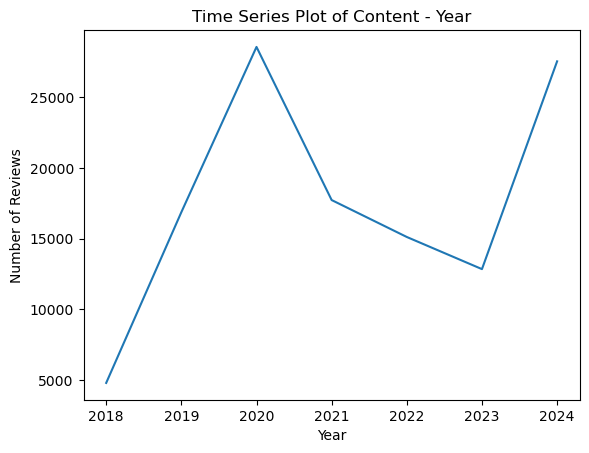

In [63]:
time_series = filtered_df.groupby('year').size()
time_series.plot(kind='line', title='Time Series Plot of Content - Year', xlabel='Year', ylabel='Number of Reviews')
plt.show()

<Axes: title={'center': 'Time Series Plot of Content- Year & Month'}, xlabel='Year, Month', ylabel='Number of Reviews'>

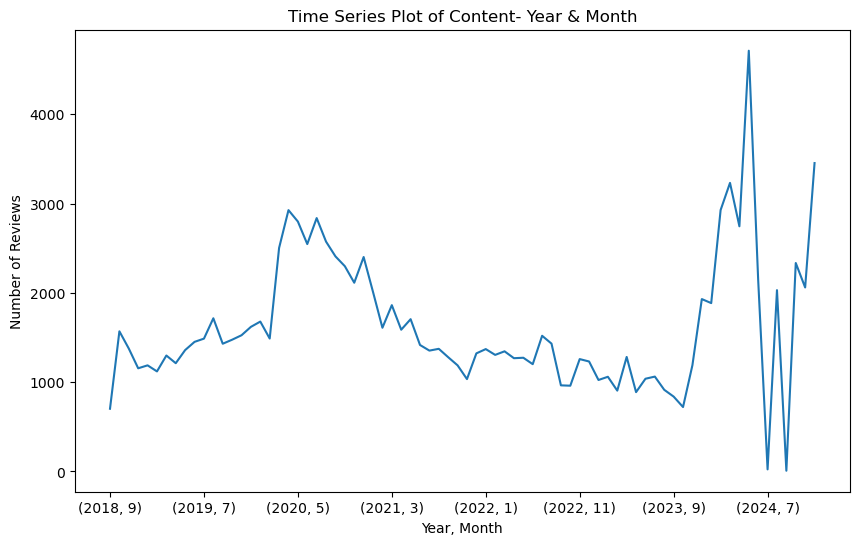

In [62]:
plt.figure(figsize=(10,6))
filtered_df.groupby(['year','month']).size().plot(kind='line', title='Time Series Plot of Content- Year & Month', xlabel='Year, Month', ylabel='Number of Reviews')


In [72]:
filtered_df

,reviewId,userName,content,score,thumbsUpCount,date,year,month,day
341,6fcd7344-d13e-46f5-ac98-d0ebec6ecb3b,ayuni ayuni,Can you prolong Big bang theory series in Netf...,5,0,2024-12-31 15:43:14,2024,12,31
342,de92d64e-999b-4cbd-8487-518126fe0629,goat and birds channel,NICE APP,5,0,2024-12-31 15:42:23,2024,12,31
343,754c9b1e-9bfa-4c23-b658-8a8804033265,Prashanth Annam,West app,1,0,2024-12-31 15:38:05,2024,12,31
344,258242e4-ba13-4233-88a0-147c721fd65f,Shubham Kadam,Primium mat maro जो movie चाहिय ओ नही मिलती मे...,1,0,2024-12-31 15:35:33,2024,12,31
345,b113fac2-503f-4acf-8480-4f099e7706be,Jahnavi Reddy,This APP IS VERY GOOD INFACT ULTIMATE I even d...,5,0,2024-12-31 15:34:33,2024,12,31
...,...,...,...,...,...,...,...,...,...
123855,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,2019-08-03 15:06:03,2019,8,3
123856,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,2022-08-15 16:16:30,2022,8,15
123857,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,2020-08-17 07:26:58,2020,8,17
123858,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,2019-07-21 09:41:42,2019,7,21


# NLP

In [79]:
# detect the language of the content
from transformers import pipeline

detector = pipeline("text-classification", model="papluca/xlm-roberta-base-language-detection")

language = []
for i in filtered_df['content']:
    result = detector(i)
    language.append(result[0]['label'])
    print(result[0]['label'])

filtered_df['language'] = language

en
it
en
hi
en
ur
en
en
en
en
en
zh
en
en
en
en
ur
en
en
en
en
en
en
en
en
en
en
hi
en
en
en
en
en
en
en
sw
ru
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
hi
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
sw
en
en
en
en
en
en
en
en
hi
en
ur
en
hi
en
en
en
en
hi
en
en
ur
en
en
en
en
en
en
en
en
en
hi
en
en
en
en
en
en
en
en
en
es
en
sw
en
en
pt
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
sw
en
en
en
en
en
sw
en
en
en
en
en
en
en
en
hi
en
hi
en
en
en
en
en
en
en
en
es
en
en
en
en
en
en
sw
en
en
en
en
en
sw
en
en
en
en
en
sw
en
en
hi
en
en
en
en
en
en
en
ur
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
sw
en
en
en
en
en
en
en
en
en
en
en
en
en
en
sw
hi
en
en
en
en
en
en
en
es
ru
ar
en
en
en
en
en
en
en
en
en
en
en
en
en
tr
sw
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
es
en
en
en
en
en
en
en
ur
en
en
ur
en
en
en
en
en
sw
en
en
en
en
en
zh
en
en
en
en
en
en
en
en
en
en
en
en
en
en
en
ur
hi
s

C:\Users\Babli Dey\AppData\Local\Temp\ipykernel_26516\1726104471.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['language'] = language


In [97]:
filtered_df.to_csv('results/filtered_netflix_reviews_language.csv', index=False)

In [85]:
filtered_df['language'].value_counts()

language
en    121181
hi       769
sw       639
ur       369
pt       124
it        96
es        70
tr        55
ar        37
nl        30
ru        28
de        27
zh        25
pl        19
bg        13
fr        12
el         9
th         7
ja         2
vi         1
Name: count, dtype: int64